# TASK #1: IMPORT DATASETS AND LIBRARIES

In [1]:
# The World Happiness Report determines the state of global happiness. 
# The happiness scores and rankings data has been collected by asking individuals to rank their life.
# Ranking ranges from 0 (worst possible life) to 10 (best possible life). 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [2]:
# Import csv file into pandas dataframe
happy_df = pd.read_csv('happiness_report.csv')

In [3]:
# print the first 5 rows of the dataframe
happy_df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [4]:
happy_df.tail()

Overall rank         Country or region  Score  GDP per capita  \
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:** 
- **Select 2 countries from the dataframe and explore scores. Perform sanity check.**

In [9]:
happy_df[happy_df['Country or region'] == 'Canada']

Overall rank Country or region  Score  GDP per capita  Social support  \
8             9            Canada  7.278           1.365           1.505   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
8                    1.039                         0.584       0.285   

   Perceptions of corruption  
8                      0.308

In [14]:
happy_df[happy_df['Country or region'] == 'Norway']

Overall rank Country or region  Score  GDP per capita  Social support  \
2             3            Norway  7.554           1.488           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
2                    1.028                         0.603       0.271   

   Perceptions of corruption  
2                      0.341

# TASK #2: PERFORM EXPLORATORY DATA 

In [15]:
# Check the number of non-null values in the dataframe
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
# Check Null values
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [17]:
# Obtain the Statistical summary of the dataframe
happy_df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [18]:
# check the number of duplicated entries in the dataframe
happy_df.duplicated().sum() # since there are no duplicates, no further action is required

0

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:** 
- **Which country has the maximum happiness score? What is the perception of corruption in this country?**

In [19]:
happy_df['Score'].max()

7.769

In [21]:
happy_df[happy_df['Score'] == happy_df['Score'].max()]

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769            1.34           1.587   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   

   Perceptions of corruption  
0                      0.393

# TASK #3: PERFORM DATA VISUALIZATION: PAIRPLOT & SCATTERMATRIX

In [22]:
# A scatterplot matrix is a matrix associated to n numerical arrays (data variables), $X_1,X_2,…,X_n$ , of the same length. 
# The cell (i,j) of such a matrix displays the scatter plot of the variable Xi versus Xj.
# Here we show the Plotly Express function px.scatter_matrix to plot the scatter matrix for the columns of the dataframe. By default, all columns are considered.

# Note:
# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 


fig = px.scatter_matrix(happy_df[['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']], width = 1500, height = 1500)
fig.show()

<Figure size 1440x1440 with 0 Axes>

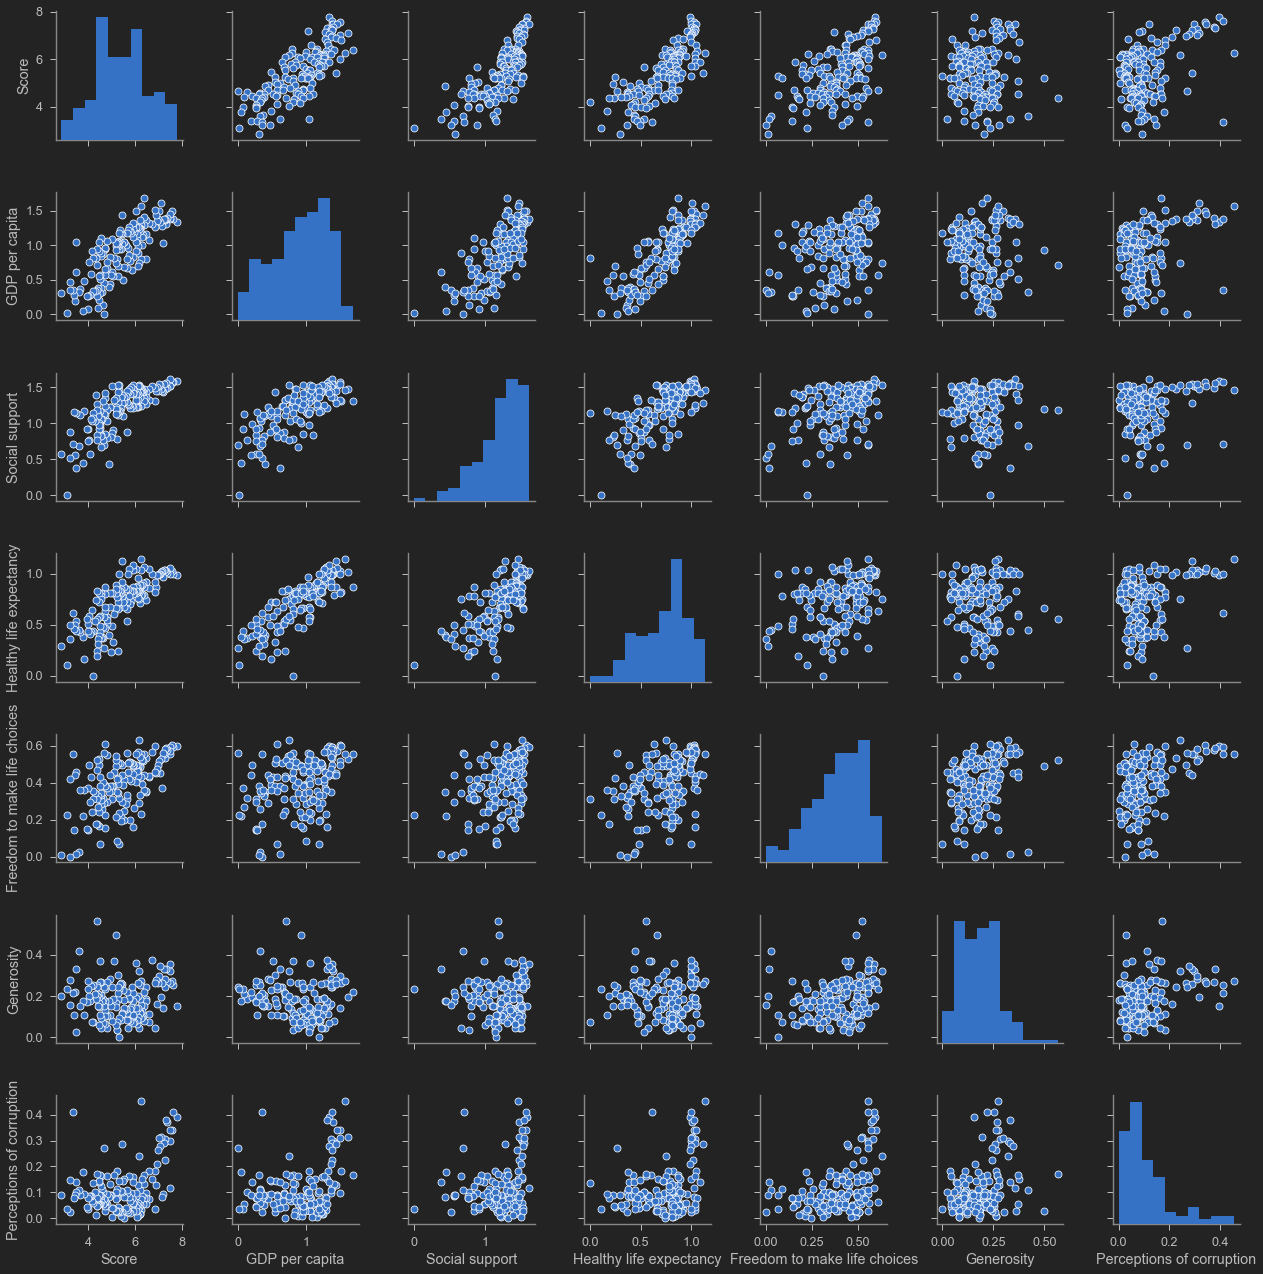

In [23]:
# Alternatively, you can use Seaborn to plot the pairplots as follows (Note that the plot is no longer interactive): 
fig = plt.figure(figsize = (20,20))
sns.pairplot(happy_df[['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 


# TASK #4: PERFORM DATA VISUALIZATION: DISTPLOT & CORRELATION MATRIX

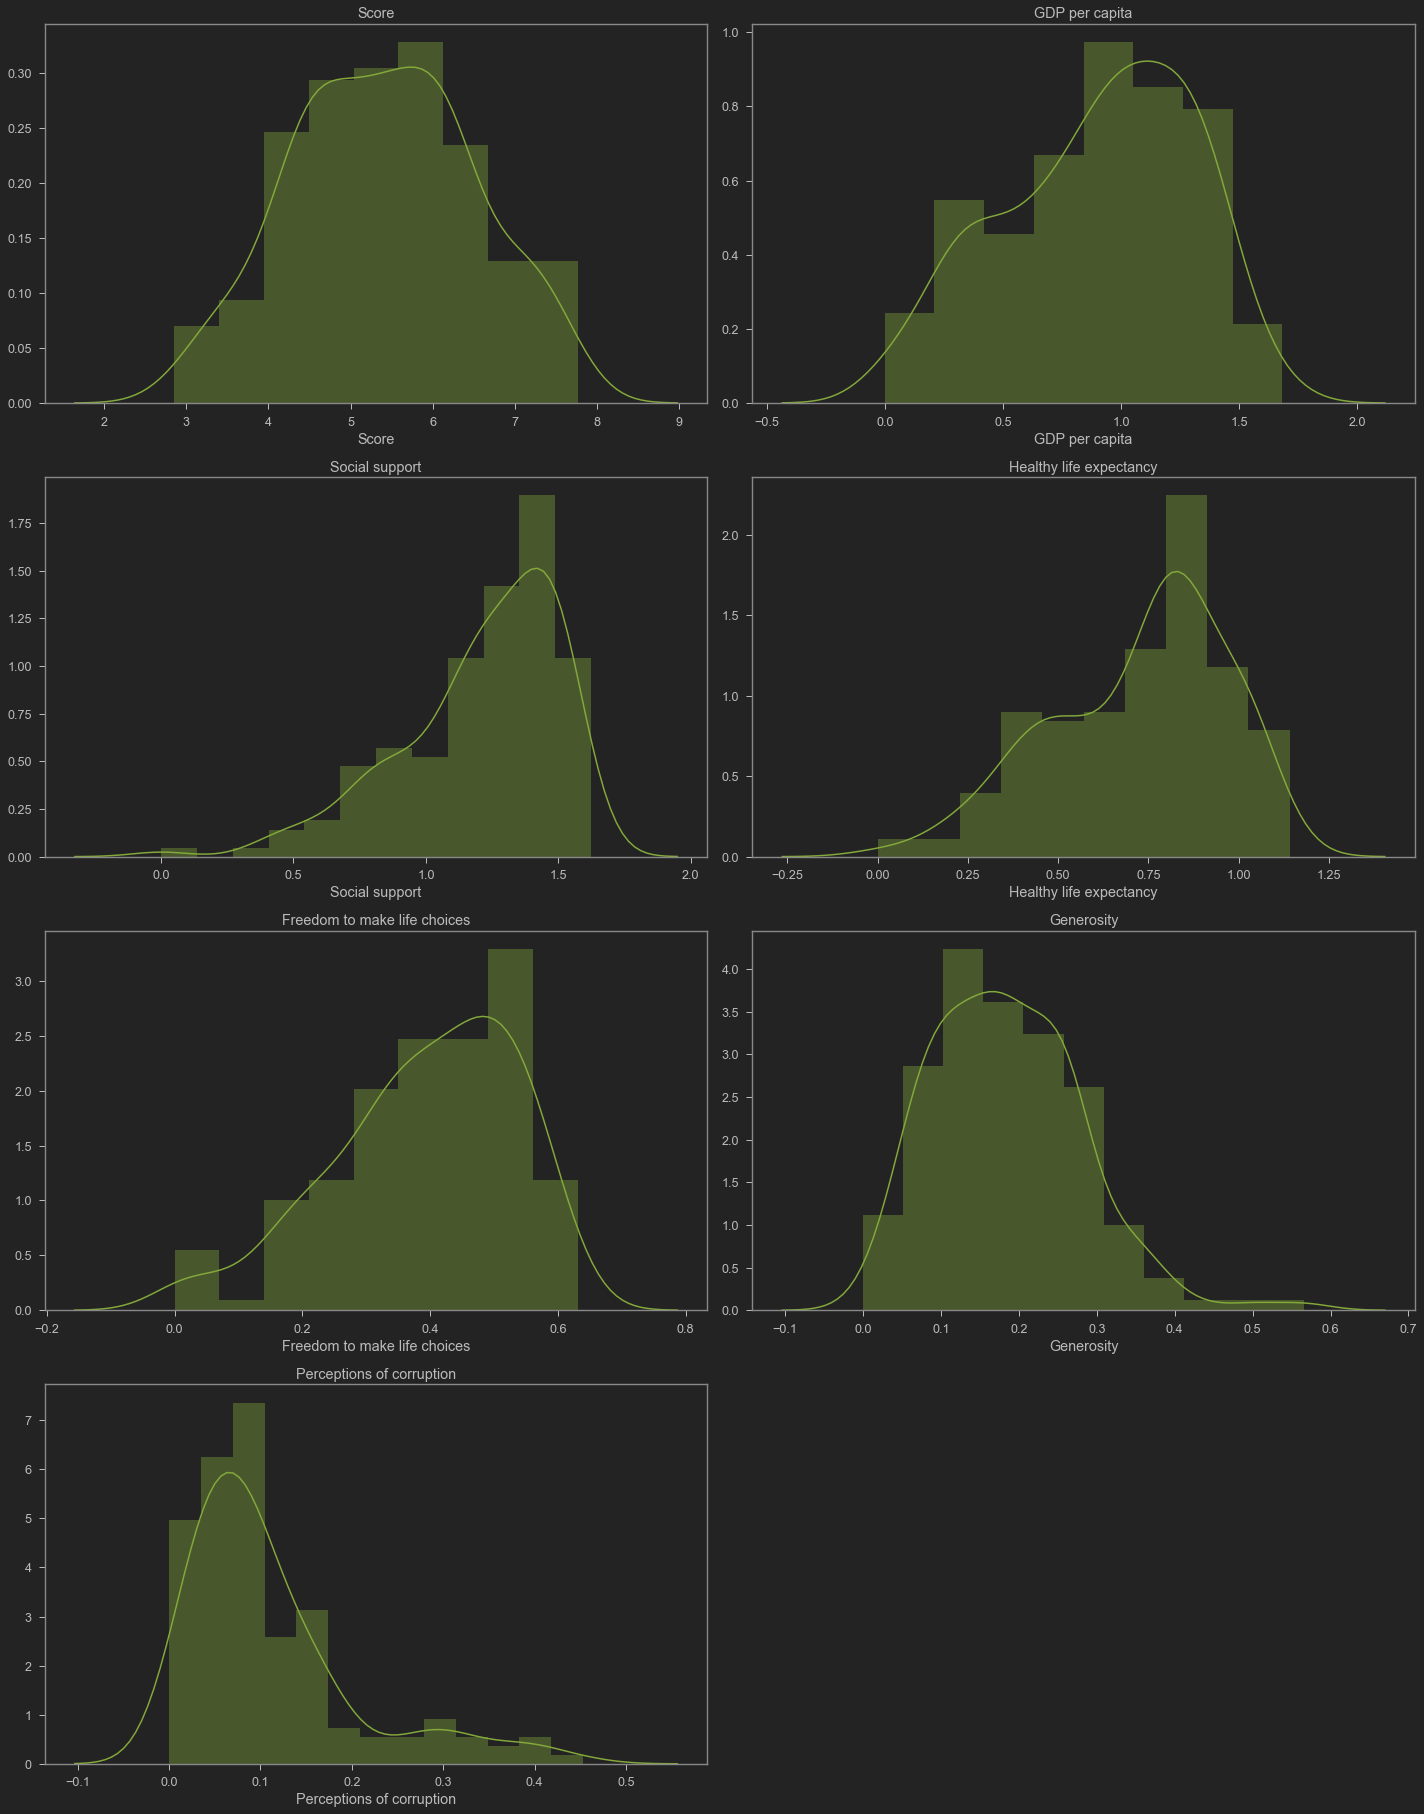

In [24]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()

columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(happy_df[columns[i]], color = 'g');
  plt.title(columns[i])

plt.tight_layout()

In [25]:
fig = px.imshow(happy_df.corr())
fig.show()

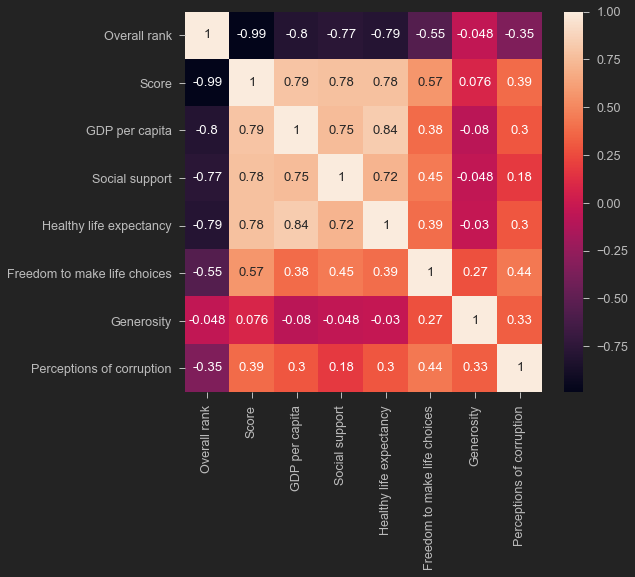

In [26]:
# Get the correlation matrix
corr_matrix = happy_df.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True)

# TASK #5: PERFORM DATA VISUALIZATION: SCATTERPLOTS AND BUBBLE CHARTS

In [27]:
# Plot the relationship between score, GDP and region
fig = px.scatter(happy_df, x = 'GDP per capita', y = 'Score', text = 'Country or region')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.show()

In [28]:
# Plot the relationship between score and GDP (while adding color and size)
fig = px.scatter(happy_df, x = "GDP per capita", y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region")

fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [29]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()